#Projet final pour le cours M1MAS "Apprentissage pour l'image", année 2023-2024

## Consignes

### Date et modalité
Ce projet est à rendre au plus tard le **12/05/2024**
Les projets sont à envoyer par email à

  ```
  emile.pierret@univ-orleans.fr
  ```

sous forme d’un python notebook (*.ipynb) contenant la sortie des cellules. Le fichier doit être nommé
  ```
  NOM_Prenom_Projet.ipynb
  ```
Si le fichier dépasse la taille de 5 Mo merci de l'envoyer par un lien cloud (comme https://filesender.renater.fr/, dropbox, filetransfer...).


On conseille de travailler avec Google Colab.
Depuis Colab vous devez faire
```
  Fichier -> Télécharger le fichier .ipynb
```
pour récupérer le fichier à envoyer.

## Plagiat


Ce qui suit est un plagiat de https://www.larousse.fr/dictionnaires/francais/plagiat/61301 :

"Plagiat, nom masculin, (de plagiaire) :

— Acte de quelqu’un qui, dans le domaine artistique ou littéraire, donne pour sien ce qu’il a pris à l’œuvre
d’un autre.

— Ce qui est emprunté, copié, démarqué."

Tout plagiat de texte est strictement interdit.
Le plagiat de morceaux de code est autorisé à condition que chaque source soit citée, en précisant le lien internet par exemple.
Cette règle ne s'applique pas au code des TPs faits en cours.


## Travail attendu

Il est attendu que:
* Toute cellule de code soit précédée par une description de ce qu'elle contient.
* Chaque résultat obtenu soit commenté.


#Classification de la base FashionMNIST par réseau de neurones

###Question 1 :
En utilisant la classe
```
CLASS torchvision.datasets.FashionMNIST
```
documentée ici :

https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST

définir les objets `trainset`, `trainloader`, `testset`, `testloader` et `classes` en définissant une fonction transform qui ramène les niveaux de gris dans l'intervalle $[-1,1]$.

Afficher quelques images avec leur classe correspondante.

Cette cellule de code est destinée à préparer les données pour le training et le testing en utilisant le dataset FashionMNIST, qui est un ensemble d'images de vêtements classifiées en différentes catégories.
On commence par importer les modules necessaires pour pour gérer les données et effectuer les transformations nécessaires avant l'entraînement. Ensuite on definit les parametres de chargements des données avec le Batch_size, après cela on charge les datasets FashionMNIST pour l'entraînement (trainset) et le test (testset) avec les transformations spécifiées.
 On passe ensuite à la configuration des DataLoaders , ce qui va nous permettre de parcourir les datasets en mini-batches de manière efficace, en mélangeant les données d'entraînement pour améliorer l'apprentissage général. Et pour finir on definit les classes du dataset.


In [ ]:
import torch  # Importation de la bibliothèque PyTorch, utilisée pour le calcul numérique rapide via des tenseurs et pour la création de réseaux de neurones profonds.
import torchvision  # Importation de la bibliothèque TorchVision, qui fournit des utilitaires pour charger et prétraiter des ensembles de données d'images, ainsi que des modèles préentraînés.
import torchvision.transforms as transforms  # Importation du sous-module 'transforms' de TorchVision, qui permet de définir des transformations d'images telles que la normalisation, le redimensionnement ou la conversion en tenseurs.


# Définition de la transformation
transform = transforms.Compose([ # combine deux transformations importantes:
    transforms.ToTensor(), # convertit les images en tenseurs PyTorch.
    transforms.Normalize((0.5,), (0.5,))  # renormalise les images en les passant de [0,1] dans [-1,1] pour les images en noir et blanc
])
# transform aide ainsi à réduire le surapprentissage et à améliorer la robustesse du modèle
# Un tenseur est une structure de données similaire à un tableau multidimensionnel
#La fonction transform rend les photos prêtes pour être utilisées par un modèle d'intelligence artificielle.

#Taille du batch
batch_size = 32 # chaque lot de données contiendra 32 images.


# Chargement des datasets
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Définition des DataLoaders
# Les DataLoaders fournissent un moyen efficace de diviser les données en lots et de les mélanger pour l'entraînement.
trainloader = torch.utils.data.DataLoader(trainset,  batch_size=batch_size,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                          shuffle=False, num_workers=2)
#Le paramètre num_workers permet de créer plusieurs processus en parallèle pour
#charger les données plus rapidement. Chaque processus s'occupe de charger
#un ou plusieurs lots de données (batchs) pendant que le modèle est en train
#d'entraîner un batch précédent.
# Classes
# Définition des noms des classes présentes dans le dataset FashionMNIST.
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')



100%|██████████| 26421880/26421880 [00:02<00:00, 11694269.20it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 208975.31it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3685087.05it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 16432478.68it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



Amélioration de la convergence : Les réseaux apprennent plus rapidement lorsque les données d'entrée sont normalisées.
Stabilité numérique : Les valeurs de grande amplitude peuvent provoquer des instabilités lors de l'entraînement.
Cohérence des données : Cela permet de garantir que les entrées sont traitées de manière cohérente, surtout lorsque différentes images peuvent avoir des gammes de valeurs différentes.

Torchvision fournit des outils utiles pour manipuler les images et les tenseurs d'images. Par exemple, il y a des fonctions pour afficher des images directement dans un notebook, ou pour convertir des tenseurs en images.

In [ ]:
len(trainloader)

1875

Chaque batch contient 1875
 exemples

Affichons quelques images avec leur classes correspondantes

Cette cellule de code(ci-dessous) contient un script qui est conçu pour visualiser un échantillon d'images du dataset FashionMNIST en utilisant la bibliothèque matplotlib et certaines fonctionnalités de PyTorch.
On commence toujours par  importer les bibliothèques necessaires pour la visualisation des images et la manipulation des données des images.
Ensuite on definit une fonction qui denormalise une image, la convertit en un tableau numpy, et puis l'affiche.
 Par la suite on chargera un echantillon d'images pour ensuite les afficher avec leurs etiquettes correspondantes.

 Je me suis servi du code vu en TP

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
# Fonction pour afficher les images
def imshow(img):
     img = img / 2 + 0.5     # unnormalize. Annulation de la normalisation pour revenir à l'échelle d'origine [0, 1]
     npimg = img.numpy()  # Conversion du tenseur en un tableau numpy pour le traitement d'image
     plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray') # Transposition des dimensions et affichage de l'image
     plt.show() # Affiche l'image à l'écran

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))



Ankle boot Sneaker Sneaker Shirt Bag   Bag   Bag   Bag   Trouser Sneaker Sandal Dress Coat  Coat  Trouser Coat  Dress Coat  Ankle boot Coat  Ankle boot Coat  Trouser Sandal Bag   Dress Shirt Shirt Sandal Sandal Shirt Sandal


plt.imshow() s'attendent à des valeurs dans une plage entre
[
0
,
1
]
[0,1] ou
[
0
,
255
]
[0,255] pour chaque canal de couleur.

Chaque image est affichée en niveaux de gris, ce qui est cohérent avec la transformation appliquée lors du chargement des données.
Les étiquettes affichées sous la grille d'images correspondent correctement à chaque image. Cela est crucial pour vérifier l'intégrité des données manipulées lors du développement de modèles de classification.

###Question 2 :

Décrire quantitativement la base de données en répondant aux questions suivantes :

* Quelle est la taille de chaque image ?
* Combien y a-t-il d'images au total pour `trainset` et `testset` ?
* Combien d'images par classe ?
* Combien de classes ?

On pourra proposer un script pour répondre aux questions.


La cellule de code ci-dessous contient un script qui réalise plusieurs tâches importantes pour examiner et analyser les données contenues dans le trainset et le testset du dataset FashionMNIST. Il inclut l'extraction des dimensions des images, le comptage du nombre total d'images, et une analyse détaillée du nombre d'images par classe dans le trainset.
Ainsi que le nombre de classes.

In [ ]:
Taille=images.shape
print("Taille de chaque image :", Taille)
# Nombre total d'images dans le trainset et le testset
nbre_trainset = len(trainset)
nbre_testset = len(testset)

# Compter le nombre d'images par classe dans le trainset
from collections import Counter # utilisée pour compter les éléments de manière efficace

etiquette= [labels for _, labels in trainset] # extraction des étiquettes de toutes les images dans le dataset d'entrainement
# etiquette est une liste qui stocke les étiquettes associées à chaque image dans le dataset d'entraînement.
#Chaque image dans le dataset FashionMNIST est étiquetée avec un entier qui représente la catégorie de vêtement
#à laquelle l'image appartient (par exemple, T-shirt/top, Trouser, Pullover, etc.)
# J'ai utilisé "for_" pour ignorer les images elles-mêmes, puisque seul l'etiquette associée à chaque image est nécessaire pour cette opération.

nbre_etiquette = Counter(etiquette) # calcule le nombre de fois que chaque étiquette est repetée dans "etiquette"
#nbre_etiquette nous renvoie les clés ( ici étiquettes ou classes des images), avec le nombre d'images correspondant à chaque clé.
nbre_classes=len(nbre_etiquette) # nombre de clés differentes dans "nbre_etiquette"


print(nbre_trainset)
print(nbre_testset)
print( nbre_etiquette)
print( nbre_classes)

Taille de chaque image : torch.Size([32, 1, 28, 28])
60000
10000
Counter({9: 6000, 0: 6000, 3: 6000, 2: 6000, 7: 6000, 5: 6000, 1: 6000, 6: 6000, 4: 6000, 8: 6000})
10


 Dans [32, 1, 28, 28] ,
 32 designe le nombre d'images dans le batch et 1 le nombre de canaux.
Chaque image est de taille 28x28.

Au total on a 60000 images pour trainset et 10000 images pour testset.

On a 6000 images par classe. Cela indique que le dataset est parfaitement équilibré,ainsi aucune classe n'est sur-representée par rapport à une autre.

On a 10 classes

 Ces resultats sont corrects vu qu'ils confirment ce qui est ecrit dans la description des données de FashionMNIST.

## Réseau de neurones convolutionnel (CNN)

On souhaite définir un réseau de neurones convolutionnel (CNN) qui s'applique aux images de `FashionMNIST`et effectue la suite d'opérations suivante :

**Partie CNN :**
 * Une convolution 2D de noyau de taille 5x5 avec 12 canaux en sortie, suivie d'une activation  ReLU.
 * Un max-pooling 2D de taille 2x2
 * Une convolution 2D de noyau de taille 5x5 avec 20 canaux en sortie, suivie d'une activation  ReLU.
 * Un max-pooling 2D de taille 2x2

**Partie linéaire :**
 * Une couche linéaire avec dimension de sortie 100, suivie d'une activation  ReLU.
 * Une couche linéaire avec dimension de sortie 60, suivie d'une activation  ReLU.
 * Une couche linéaire finale permettant la classification.



Un Réseau de Neurones Convolutif (CNN) est une architecture de réseau de neurones spécialement conçue pour traiter des données structurées en grille, comme les images. Contrairement aux réseaux entièrement connectés (MLP), où chaque neurone est connecté à tous les autres, un CNN exploite la structure locale des données (comme les motifs spatiaux dans une image) en appliquant des filtres ou "convolutions" qui se concentrent sur des parties spécifiques de l'image.

Structure d'un CNN
Les CNN sont généralement composés de trois types de couches principales :

Couches Convolutives (Convolutional Layers) :

C'est la pierre angulaire du CNN. Un filtre (ou noyau) de taille plus petite que l'image est glissé sur l'image pour détecter des motifs locaux (comme les bords, les textures, ou les formes). Chaque convolution produit une "carte de caractéristiques" (feature map) qui capture les motifs détectés dans l'image.
Chaque filtre est entraîné pour reconnaître un certain motif. Au fur et à mesure que le réseau progresse dans les couches, ces motifs deviennent de plus en plus complexes (d'abord des bords, puis des formes, et enfin des objets entiers).
Couches de Pooling (Pooling Layers) :

Ces couches réduisent la taille des cartes de caractéristiques, diminuant ainsi le nombre de paramètres et la complexité du réseau. La méthode la plus courante est le max pooling, où la valeur maximale d'une région est prise pour résumer cette région.
Cela permet aussi d'ajouter de la robustesse aux petites transformations (comme les rotations ou les translations) de l'image.
Couches Entièrement Connectées (Fully Connected Layers) :

Après plusieurs couches de convolutions et de pooling, les cartes de caractéristiques sont aplaties en un vecteur, qui est ensuite passé à une ou plusieurs couches entièrement connectées. Ces couches sont généralement responsables de la classification finale ou des prédictions.
Avantages des CNN
Partage des poids : Contrairement à un réseau entièrement connecté, où chaque neurone a des poids uniques pour chaque connexion, dans un CNN, un seul filtre est utilisé pour traiter toute l'image, ce qui réduit drastiquement le nombre de paramètres.
Invariance aux translations : Les CNN sont capables de détecter des objets, peu importe où ils apparaissent dans l'image, grâce à leur structure de convolution et de pooling.
Extraction automatique de caractéristiques : Les couches convolutives apprennent automatiquement quelles caractéristiques sont importantes à partir des données, sans qu'il soit nécessaire de spécifier manuellement des caractéristiques (comme dans les approches traditionnelles de vision par ordinateur).

###Question 3 :

Etant donné un batch `x` (dont on précisera les dimensions) en entrée du CNN, expliciter les dimensions des tenseurs en entrée et en sortie de chacune des couches successives du réseau. On prendra soin de préciser les opérations nécessaires pour passer de la partie CNN à la partie linéaire.

Entrée du CNN:
Soit x un batch, voici ses dimensions [32,1,28,28] avec 32 images
Prémiere couche de convolution de noyau de taille 5x5 avec 12 canaux en sortie, suivie d'une activation ReLU:
Dimensions_tenseurs en entrée: [32,1,28,28]
Dimensions_tenseurs en sortie: [32,12,24,24]

Première couche de pooling de taille 2x2 :
Dimensions_tenseurs en entrée: [32,12,24,24]
Dimensions_tenseurs en sortie: [32,12,12,12]

Deuxieme couche de convolution de noyau de taille 5x5 avec 20 canaux en sortie, suivie d'une activation ReLU:
Dimensions_tenseurs en entrée: [32,12,12,12]
Dimensions_tenseurs en sortie: [32,20,8,8]

Deuxieme couche de pooling de taille 2x2 :
Dimensions_tenseurs en entrée: [32,20,8,8]
Dimensions_tenseurs en sortie: [32,20,4,4]


Operations necessaires:

A ce moment là nous avons des  matrices à trois dimensions. Avec les couches linéaires, ces matrices doivent être converties en vecteurs de dimensions 1. Cette opération est souvent appelée "flattening"(aplatissement).
Chaque couche entièrement connectée est suivie par une activation ReLU, sauf la dernière qui génère les valeurs non normalisées.

Flattening :
Avant Flattening:[32,20,4,4]
Après Flattening: [32,320]
Aplatissement en un vecteur de 320 éléments (20x4x4).


Prémiere couche linéaire avec dimension de sortie 100, suivie d'une activation ReLU.
Dimensions_tenseurs en entrée: [32,320]
Dimensions_tenseurs en sortie: [32,100]

Deuxieme couche linéaire avec dimension de sortie 60, suivie d'une activation ReLU.
Dimensions_tenseurs en entrée: [32,100]
Dimensions_tenseurs en sortie: [32,60]

Couche lineaire finale permettant la classification:
Dimensions_tenseurs en entrée: [32,60]
Dimensions_tenseurs en sortie: [32,10]

###Question 4 :
Définir une class `CNNet` qui implémente le modèle décrit ci-dessus.

Définir un réseau cnnet = CNNet() et tester sa fonction `forward` sur un batch du `trainset`.

Quel est le nombre de paramètres du réseau ?

 La cellule de code ci-dessous contient un script qui définit la classe de réseau de neurones convolutif (CNNet) utilisant le modèle  décrit ci-dessus, conçue pour traiter les images FashionMNIST à un seul canal et les classifier en 10 catégories différentes.
 Ainsi on déclare les Couches du Réseau, on definit la methode forward qui définit comment les données passent à travers le réseau et on finit par une instantiation de la classe CNNet.

In [ ]:
import torch
import torch.nn as nn #Il contient des classes pour construire des couches, des fonctions d'activation, des fonctions de perte
import torch.nn.functional as F


class CNNet(nn.Module):

    def __init__(self):
        super(CNNet, self).__init__()
        # 1 canal d'image d'entrée, 12 canaux de sortie, convolution carrée 5x5
        # noyau
        self.conv1 = nn.Conv2d(1, 12, 5) # 1 canal d'entrée, 12 entrée de sortie, noyaux de taille(5,5); on peut switcher le 5 en (5,5)
        self.conv2 = nn.Conv2d(12, 20, 5) # le meme 12 qu'on a la-haut,
        # une opération affine: y = Wx + b
        self.fc1 = nn.Linear(20 * 4 * 4, 100) # Dimension lineaire apres le flattenning
        self.fc2 = nn.Linear(100, 60)
        self.fc3 = nn.Linear(60, 10) # 10 classes de sortie pour FashionMNIST

    def forward(self, x):
        # Max pooling over a (2, 2) window # max  pooling pour reduire la taille
        x=self.conv1(x)
        x=F.relu(x)
        x=F.max_pool2d(x,(2,2))
        # Si la taille est un carré, on peut la spécifier avec un seul chiffre
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1) # flatten toutes les dimensions à l'exception de la dimension du batch
        # c'est pour pouvoir faire l'operation matrix-vecteur en faisant un reshape (mettre toutes les colonnes dans une seule colonne)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


cnnet = CNNet()


#on peut tester la sortie de softmax
#F.softmax(cnnet(images[0].unsqueeze(0)),dim=1)



#  Testons sa fonction forward sur un batch du trainset.

Le script suivant teste la fonction forward de l'instance du modèle CNNet sur un batch d'images du trainset. Cela permet de vérifier que le modèle peut traiter un batch d'images et renvoie une sortie de forme attendue.

In [ ]:
#Tester sa fonction forward sur un batch du trainset.
tensor_sortie = cnnet(images) #exécute la méthode forward sur le batch d'images.
print(tensor_sortie.shape) # Afficher la forme du tenseur de sortie pour vérifier la dimensionnalité de la sortie.

torch.Size([32, 10])


Commentaire: le réseau doit traiter un batch de 32 images (comme spécifié par le batch_size de 32), la taille de sortie [32, 10] signifie que le modèle traite correctement les batches d'images et renvoie une prédiction pour chacune des 10 classes pour chaque image du batch. Ceci indique que le réseau est bien configuré.

# Nombre de paramètres du réseau

Cette cellule de code ci-dessous contient un script qui  est conçu pour calculer et afficher le nombre total de paramètres (poids et biais) dans le réseau de neurones CNNet.




In [ ]:
#  Nombre de paramètres du réseau
params = list(cnnet.parameters()) # Récupération de la liste de tous les paramètres (poids et biais) du modèle CNNet
nb_params =0 ## Initialisation du compteur de paramètres à zéro
# Boucle pour calculer le nombre total de paramètres en accumulant le nombre d'éléments de chaque paramètre
for k in range(len(params)):
    nb_params += torch.prod(torch.tensor(params[k].size()))
print(nb_params) # Affichage du nombre total de paramètres calculé

tensor(45102)


le réseau de neurones convolutif CNNet contient exactement 45102 paramètres. Ce nombre inclut les poids et les biais de toutes les couches du réseau, à savoir les couches convolutives et les couches entièrement connectées (ou linéaires).
 Avec plus de 45000 paramètres, le modèle demandera une quantité significative de mémoire pour stocker ces paramètres et les gradients associés pendant l'entraînement.
 Cela affectera la performance et le temps d'entraînement.


In [ ]:
cnnet(images)


tensor([[-0.1142, -0.1206, -0.0086,  0.0892, -0.0900, -0.0465,  0.0256, -0.1416,
          0.1982, -0.0688],
        [-0.1119, -0.1052, -0.0127,  0.1014, -0.0822, -0.0256,  0.0236, -0.1408,
          0.1792, -0.0818],
        [-0.1083, -0.1263, -0.0336,  0.0847, -0.1123, -0.0223,  0.0391, -0.0941,
          0.1860, -0.0776],
        [-0.1255, -0.1071, -0.0129,  0.0913, -0.0831, -0.0198,  0.0212, -0.1420,
          0.1823, -0.0702],
        [-0.1221, -0.1193, -0.0247,  0.1049, -0.0956, -0.0234,  0.0315, -0.1216,
          0.1869, -0.0707],
        [-0.1119, -0.1073, -0.0125,  0.0853, -0.0824, -0.0424,  0.0277, -0.1347,
          0.1966, -0.0806],
        [-0.0997, -0.1195, -0.0341,  0.0855, -0.1032, -0.0216,  0.0372, -0.0916,
          0.1792, -0.0840],
        [-0.1206, -0.1016, -0.0106,  0.0800, -0.0703, -0.0162,  0.0362, -0.1378,
          0.2032, -0.0627],
        [-0.0950, -0.1113, -0.0242,  0.0967, -0.1048, -0.0159, -0.0015, -0.1032,
          0.1674, -0.0770],
        [-0.1144, -

Ici  nous avons des valeurs non normalisées appelées logits qui representent les scores prédits pour chaque classe par le reseau. Les logits positifs indiquent une prédiction plus forte en faveur d'une classe, tandis que les valeurs négatives sont moins favorables.
Pour une meilleur interpretation , nous allons convertir ces scores en probabilités.

 En effet ceci va normaliser les scores pour que chaque ligne somme à 1.

In [ ]:
probabilities = F.softmax(tensor_sortie, dim=1)
print("Probabilities:", probabilities)
print("Sum of probabilities for a sample:", probabilities[0].sum())  # Devrait être 1


Probabilities: tensor([[0.0912, 0.0906, 0.1014, 0.1118, 0.0935, 0.0976, 0.1049, 0.0888, 0.1247,
         0.0955],
        [0.0913, 0.0919, 0.1008, 0.1130, 0.0940, 0.0995, 0.1045, 0.0887, 0.1221,
         0.0941],
        [0.0917, 0.0901, 0.0988, 0.1112, 0.0913, 0.0999, 0.1063, 0.0930, 0.1231,
         0.0946],
        [0.0901, 0.0918, 0.1009, 0.1120, 0.0941, 0.1002, 0.1044, 0.0887, 0.1226,
         0.0953],
        [0.0903, 0.0906, 0.0996, 0.1133, 0.0927, 0.0997, 0.1053, 0.0904, 0.1230,
         0.0951],
        [0.0913, 0.0918, 0.1009, 0.1112, 0.0941, 0.0979, 0.1050, 0.0893, 0.1243,
         0.0942],
        [0.0924, 0.0906, 0.0987, 0.1112, 0.0921, 0.0999, 0.1060, 0.0932, 0.1221,
         0.0939],
        [0.0900, 0.0917, 0.1004, 0.1100, 0.0946, 0.0999, 0.1053, 0.0884, 0.1244,
         0.0953],
        [0.0930, 0.0915, 0.0999, 0.1127, 0.0921, 0.1007, 0.1021, 0.0923, 0.1209,
         0.0947],
        [0.0914, 0.0911, 0.1010, 0.1133, 0.0937, 0.0985, 0.1037, 0.0892, 0.1237,
         0.09

Pour faciliter, choisissons une image specifique.

In [ ]:
F.softmax(cnnet(images[3].unsqueeze(0)),dim=1)

tensor([[0.0901, 0.0918, 0.1009, 0.1120, 0.0941, 0.1002, 0.1044, 0.0887, 0.1226,
         0.0953]], grad_fn=<SoftmaxBackward0>)

Cette prediction n'est pas vraiment raisonnable car la plus grande proba:0.1126 correspond à Dress alors l'image 3 correspond à un sac (bag).

Le code ci-dessous me permettait d'enregistrer le fichier CNNET.pt que vous m'aviez envoyé. Cependant ayant compris que c'etait un problème de batch_size, j'ai re-adapté mes scripts.  


In [ ]:
#from google.colab import files
#uploaded = files.upload()



Saving cnnet.pt to cnnet (1).pt


##Entraînement du réseau

###Question 5 :
Proposer un script qui entraîne le réseau `cnnet` sur 10 epochs avec affichage à chaque epochs de l'"epoch loss" (moyenne des loss sur chaque batch considérés dans l'epoch, soit la "running loss" accumulée sur toute l'epoch) et du temps total de l'entraînement.



Cette cellule de code ci-dessous contient un  script qui configure et exécute un processus d'entraînement pour CNNet. On commence par importer les Modules necessaires et initialiser les paramètres. Ensuite on Configure la Fonction de Perte et de l'Optimiseur , on definit une boucle d'entraînement sur les epochs(époques) et pour finir après chaque époque, la perte moyenne est calculée et affichée.
Après l'entraînement, le temps total d'entraînement est affiché.

***Mise à jour des poids par batch (optimizer.step() )***

Pour la boucle d'entraînement:
*   La boucle externe itère sur le nombre total d'époques spécifié.

*   La boucle interne itère sur les batches de données du trainloader.
*   Pour chaque batch, les gradients sont réinitialisés, le processus forward est exécuté pour obtenir les outputs, la perte est calculée et la rétropropagation est effectuée, suivie par une mise à jour des poids du modèle.

En somme  on réalise un entraînement complet du modèle CNNet sur le dataset FashionMNIST, avec un retour sur la perte par époque(epoch) et le temps total nécessaire pour l'entraînement.

In [ ]:
import torch.optim as optim
#ce module fournit des optimisateurs comme SGD, Adam, RMSprop, et d'autres,
#qui sont des techniques courantes pour ajuster les poids des réseaux de neurones
#lors de l'entraînement en minimisant la fonction de perte.
import time # Module pour mesurer le temps, on veut calculer la durée de l'entraînement.

criterion = nn.CrossEntropyLoss() #  Définit la fonction de perte CrossEntropyLoss.
optimizer = optim.SGD(cnnet.parameters(), lr=0.01, momentum=0.9) # Définit l'optimiseur Stochastic Gradient Descent (SGD) avec un certain taux d'apprentissage et momentum
#lr : Le taux d'apprentissage (learning rate) qui contrôle la vitesse à laquelle les poids sont mis à jour.
#momentum : Un paramètre qui aide à accélérer l'apprentissage en dirigeant le gradient dans la bonne direction.
# Entraînement
start_time = time.time() # Enregistre le moment de début de l'entraînement pour calculer sa durée totale à la fin.
for epoch in range(10):  # Entraîner sur 10 epochs
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = cnnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()  # Calcul des gradients
        optimizer.step()  # Mise à jour des poids

        running_loss += loss.item()  #  Accumule les pertes pour chaque batch au sein d'une époque.

    # Affichage de la perte moyenne pour l'epoch
        #epoch_loss = running_loss / len(trainloader)
    print(f'Epoch {epoch + 1}: Loss = {running_loss / len(trainloader):.3f}')

total_time = time.time() - start_time
print(f'Entrainement achévé en {total_time:.2f} secondes')



Epoch 1: Loss = 0.609
Epoch 2: Loss = 0.355
Epoch 3: Loss = 0.307
Epoch 4: Loss = 0.280
Epoch 5: Loss = 0.260
Epoch 6: Loss = 0.245
Epoch 7: Loss = 0.231
Epoch 8: Loss = 0.219
Epoch 9: Loss = 0.208
Epoch 10: Loss = 0.198
Entrainement achévé en 409.89 secondes


Tout d'abord commençons par définir un epoch.
Une epoch(cycle) est réalisée quand toutes les données d'entrainement ont été utilisées pour entraîner le reseau. Et chaque epoch permet au modèle d'apprendre et de s'ameliorer à partir des erreurs commises dans les predictions précedentes.Essentiellement en ajustant ses poids.

Ainsi l'epoch est là pour mettre à jour les paramètres du modèle.

Sans rentrer dans les détails , plus la perte est minime plus le modèle a été bien entraîner . Ici on remarque une dimunition de la perte sur les 10 periodes , ceci montre que le reseau apprend .

La perte continue de diminuer à chaque époque sans augmenter, ceci montre que
dans le reseau il n'y a pas de  sur-apprentissage ou d'instabilité.





Je vais enregistré l'état actuel de CNNet dans un fichier sur le disque. Cela me permettra de conserver les paramètres appris du modèle après l'entraînement pour une utilisation future, sans avoir besoin de réentraîner le modèle à chaque fois.

In [ ]:
PATH = './FashionMNIST_cnnet.pth' # Définit le chemin du fichier où le modèle sera sauvegardé
torch.save(cnnet.state_dict(), PATH) # Sauvegarde l'état du modèle dans le fichier spécifié par PATH


La cellule de code ci-dessous nous indique comment charger les paramètres sauvegardés de notre reseau . Cela permet de restaurer rapidement l'état de mon modèle précédemment entraîné sans  encore une fois nécessiter un nouvel entraînement.

In [ ]:
cnnet = CNNet() # Crée une nouvelle instance du modèle CNNet
PATH = './FashionMNIST_cnnet.pth'
cnnet.load_state_dict(torch.load(PATH)) # Charge les paramètres sauvegardés dans l'instance du modèle cnnet



<All keys matched successfully>

### Question 6 :

Expliquer la relation mathématique entre la sortie du réseau de neurones et la classe prédite par le réseau de neurone. Justifier cette formule.


La sortie du reseau de neurones va nous donner un vecteurs de valeurs non normalisées ou logits(regression logistique) produites par la derniere couche lineaire qui representent des scores pour chaque classe. Pour mieux comprendre comment le reseau classe les images on applique la fonction Softmax qui va normaliser ces scores afin de prevenir les problemes numeriques qui peuvent survenir lors l'interpretation tels que l'ecrasement des gradients.
En effet la fonction Softmax transformera ces scores en probabilités en utilisant la formule suivante:

Pour un vecteur de logits $w=w_1,w_2,...,w_K$ qui correspond à K classes
$$ p_k = \frac{e^{w_k}}{\sum_{j=1} e^{w_j}}
$$  
où $e^{w_k}$  est l'exponentielle du logit pour la classe k

$\sum_{j=1} e^{w_j}$ est la somme des exponentielles de tous les logits, ce qui normalise les probabilités pour qu'elles somment à 1.

Cette formule represente la probabilité que le reseau prédise que l'image appartient à la classe k

Justification:

Sans faire le softmax on remarque des valeurs negatives à la sortie ainsi la fonction exponentielle nous assure que toutes les valeurs sont positives et la division par la somme des exponentielles assure la normalisation

Aussi afin d'être plus confiant dans la prediction de la classe , l'exponentielle nous permettra d'avoir des probabilités plus distinctives

Ensuite on choisit la classe ayant la plus haute probabilité qui est theoriquement la plus probable d'être la vraie classe de l'image donnée.

Cette méthode est justifiée par sa capacité à fournir des estimations probabilistes normalisées et à optimiser la décision de classification basée sur ces estimations.







### Question 7 :
A l'aide des fonctions de ```sklearn```utilisées en cours, évaluer la performance du réseau entraîné (rapport de classification et matrice de confusion).

Commenter les résultats. Que proposez-vous pour améliorer les performances du réseau ?

Les 2 cellules ci-dessous evalue la performance du réseau entraîné en utilisant ce dit reseau CNNet pour prédire les classes sur le dataset de test, génèrer un rapport de classification, et afficher une matrice de confusion.
On commence par initialiser les tenseurs pour les étiquettes et les prédictions, ensuite on definit une boucle de prédiction sans calcul de gradient , par la suite après avoir importer les modules nécessaires pour générer un rapport de classification et une matrice de confusion, on Convertit les Tenseurs PyTorch en Numpy pour l'analyse . Et pour finir on affiche le rapport de classification et  la matrice de confusion après avoir calculer ce dernier.

In [ ]:
# Initialisation de deux tenseurs vides pour stocker les étiquettes réelles et les prédictions
# à mesure que les données sont traitées batch par batch.
all_labels = torch.tensor([])
all_predicted = torch.tensor([])
with torch.no_grad(): #Désactivation du calcul des gradients pour économiser de la mémoire et accélérer l'évaluation
# (aucune mise à jour des poids n'est nécessaire)
    for data in testloader:
        images, labels = data  # Extraction des images et des étiquettes du lot de test
        outputs = cnnet(images)  # Passage des images dans le modèle CNN pour obtenir les prédictions (outputs)
        _, predicted = torch.max(outputs.data, 1)# Utilisation de torch.max pour obtenir la classe avec la plus grande valeur (probabilité la plus élevée)
        #Le paramètre 1 indique qu'on cherche le maximum sur la deuxième dimension (les classes)

        all_labels = torch.cat((all_labels, labels)) # Concatenation des étiquettes réelles actuelles avec les étiquettes précédemment stockées
        all_predicted = torch.cat((all_predicted, predicted)) # Concatenation des prédictions actuelles avec les prédictions précédemment stockées


              precision    recall  f1-score   support

 T-shirt/top       0.84      0.86      0.85      1000
     Trouser       0.98      0.99      0.98      1000
    Pullover       0.83      0.83      0.83      1000
       Dress       0.91      0.89      0.90      1000
        Coat       0.85      0.86      0.85      1000
      Sandal       0.99      0.91      0.95      1000
       Shirt       0.73      0.70      0.72      1000
     Sneaker       0.88      0.99      0.93      1000
         Bag       0.95      0.97      0.96      1000
  Ankle boot       0.97      0.93      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



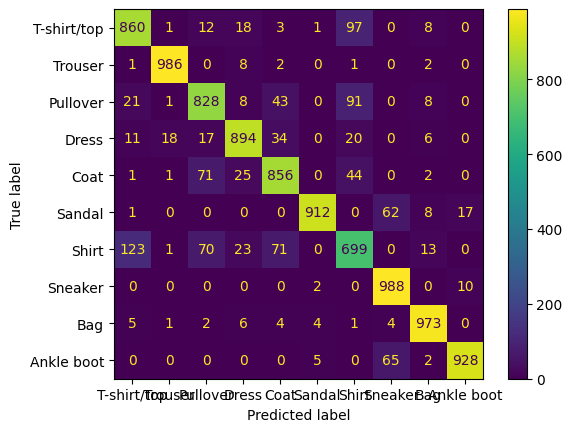

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

t_test = all_labels
t_pred = all_predicted


#Classification report
print(classification_report(t_test,t_pred,target_names = classes))

#Confusion matrix
rcm = confusion_matrix(t_test,t_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=rcm,display_labels = classes)
disp.plot()

classification_report : Fournit un rapport détaillé des métriques de performance (précision, rappel, F1-score) pour chaque classe.

confusion_matrix : Génère une matrice de confusion pour comprendre comment les prédictions se répartissent par rapport aux vraies classes.

ConfusionMatrixDisplay : Affiche la matrice de confusion sous forme de graphique pour une meilleure interprétation visuelle des résultats.

### Le pLus important:
Comme vu en TP , on s'interesse plus à la ligne (accuracy) notamment avec la colonne f1-score qui represente la precision globale du modèle est de 89%, ce qui est extrêmement élevé. Cela indique que le modèle a correctement classé  89% des exemples du testset.

### Pour la matrice de confusion:
Sur la diagonale, nous avons le nombre de prédictions correctes pour chaque classe et en dehors de la diagonale le nombre de predictions incorrectes.

Les classes 1,5,7 et 8 sont prédites  avec une forte précision et avec une faible confusion avec d'autres classes.

 La classe 0 T-shirt/top a   souvent été confondu avec la classe Shirt (231 T-shirt/top ont été prédit comme Shirt). Cela pourrait indiquer une similarité visuelle entre ces deux classes que le modèle a du mal à distinguer, ceci se comprend en regardant les datasets de FashionMNIST .

 La classe 4 Coat a souvent été confondu avec la classe Shirt (153 coat ont été prédits comme shirt).

 Dans l'ensemble on peut dire que le modèle performe bien avec une précision  élevée.

 Amelioration:

 En augmentant le taille du batch et le nombre de couches car avec plus de couches on peut capter des cas complexes.
La taille du batch affectera efficacité de l'apprentissage et l'utilisation de la mémoire.

On pourrait egalement modifier les paramètres comme le Taux d'apprentissage "lr" et le momentum dans le de trouver un meilleur minimum global durant l'entraînement et une stabilisation de la convergence.






In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

# Génération du rapport de classification
resnet_report = classification_report(all_labels, all_predicted, target_names=classes, output_dict=True)

# Conversion du rapport en DataFrame et exportation en CSV
resnet_report_df = pd.DataFrame(resnet_report).transpose()
#report_df.to_csv('classification_reports.csv', index=True)
#print("Le rapport de classification a été exporté en classification_report.csv")

In [ ]:
from sklearn.metrics import confusion_matrix

# Génération de la matrice de confusion
resnet_cm = confusion_matrix(all_labels, all_predicted)

# Conversion de la matrice de confusion en DataFrame
resnet_cm_df = pd.DataFrame(resnet_cm, index=classes, columns=classes)

# Exportation en CSV
#cm_df.to_csv('confusion_matrix.csv', index=True)
#print("La matrice de confusion a été exportée en confusion_matrix.csv")


### Question 8 :

Le code ci-dessous permet de charger 5 images sous forme de tensor et de les afficher. Que représente chacune de ces images ?


Faire passer ces images dans le réseau. Que se passe-t-il ? ( Il se peut que cela provoque des erreurs ). Expliquer.

**Attention :** Pour rappel, les images sont renormalisées avant de passer dans le réseau.

Si le code ci-dessous ne fonctionne pas, faire la question 8bis.

In [ ]:
!git clone 'https://github.com/emilePi/Images_2024'

Cloning into 'Images_2024'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 13 (delta 2), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (13/13), 6.57 KiB | 2.19 MiB/s, done.
Resolving deltas: 100% (2/2), done.


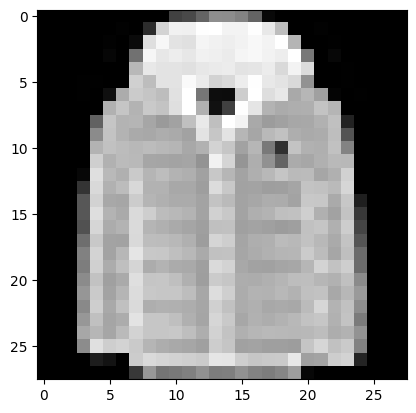

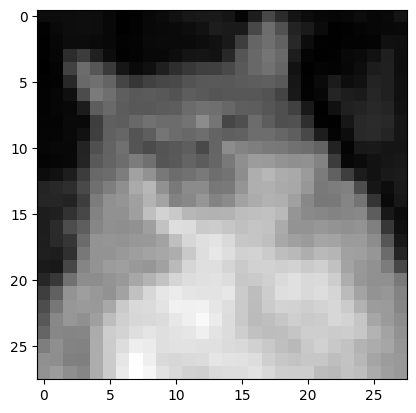

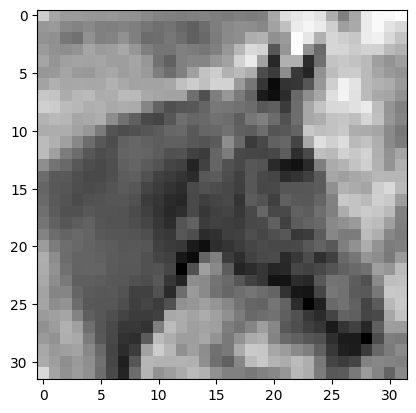

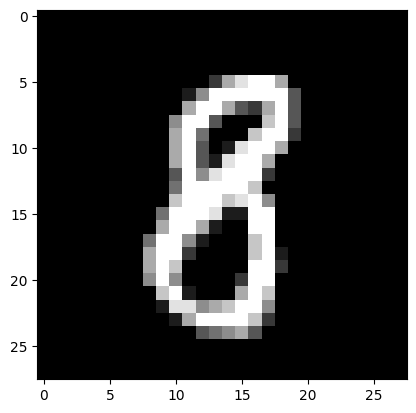

In [ ]:
import io
import requests
from PIL import Image
from torchvision.transforms.functional import to_tensor
import pylab as plt
import numpy as np


img1 = to_tensor(Image.open('./Images_2024/coat.png'))

img2 = to_tensor(Image.open('./Images_2024/cat.png'))

img3 = to_tensor(Image.open('./Images_2024/horse.png'))

img4 = to_tensor(Image.open('./Images_2024/MNIST.png'))

img5 = to_tensor(Image.open('./Images_2024/red_shoes.png'))

for img in [img1,img2,img3,img4,img5] :
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)),cmap = 'gray')
    plt.show()

La première image représente un manteau, ce qui est un objet de classification typique dans les datasets comme FashionMNIST.
La 2eme image un chat. Ce n'est pas un objet typiquement présent dans des datasets comme FashionMNIST vu que cette dernière se concentre sur des articles de mode.
La 3eme image un cheval, encore une fois, ce n'est pas un article de mode .
La 4eme image est une image du chiffre 8, ce n'est pas un article de mode.
La 5eme image est une chaussure rouge, ce qui est un objet de classification typique dans les datasets comme FashionMNIST.

Dans les cinq cellules qui suivent on va appliquer une transformation de normalisation sur les 5 images, les preparer pour notre modèle en ajoutant une dimension de lot à chaque image afin qu'elles puissent être traitées par notre modele. En effet ceci va transformer le tenseur de forme [C, H, W] en [1, C, H, W] où C est le nombre de canaux, et H, W sont la hauteur et la largeur. Cette opération est nécessaire car le modèle s'attend à recevoir les données sous forme de lots, même si le lot contient une seule image.

Pour finir on affiche la sortie du modèle pour l'image donnée

In [ ]:
transform = transforms.Normalize((0.5,), (0.5,))
img1 = transform(img1)
output1 = cnnet(img1.unsqueeze(0))  # Unsqueeze pour ajouter une dimension de lot
print(output1)



tensor([[ -2.3256,  -2.8636,  27.3938,  -6.4538,  51.3815, -20.2744,  19.8819,
         -37.6683, -12.4936, -24.3813]], grad_fn=<AddmmBackward0>)


Les valeurs dans le tensor représentent les scores attribués à chacune des 10 classes.
Les scores varient entre positifs et négatifs. Des scores plus élevés indiquent que le modèle prédit plus fortement la classe correspondante pour l'image donnée.

Le score le plus élevé est 51.3815 pour la classe 4, ce qui suggère que  l'image a le plus de probabilité d'appartenir à cette classe d'après le modèle.

Ce qui est correct car la classe 4 correspond à Coat . C'est une bonne prediction du modèle(réseau).

La valeure négative la plus importante est -37.6683 pour la classe 7, ceci montre une confiance faible que l'image appartient à cette classe.

In [ ]:
img2 = transform(img2)
output2 = cnnet(img2.unsqueeze(0))  # Unsqueeze pour ajouter une dimension de lot
print(output2)

tensor([[  6.1501,  -0.1545, -11.8508,   9.4047,  11.0961,  -5.4332,   5.9244,
         -24.6383,  51.1027, -31.8881]], grad_fn=<AddmmBackward0>)


Ici le score le plus élevé est 51.1027 pour la classe 8, ce qui suggère que le modèle penche vers cette classe comme prédiction.

Ceci est bizzare car il predit un chat comme un sac. Cependant vu que "chat" n'est pas dans les datasets de FashionMNIST ça peut se comprendre.

Ici le score le plus élevé negativement est -31.8881 pour la classe 9, ce qui suggère que le modèle penche le moins possible vers cette classe comme prédiction.

In [ ]:
img3 = transform(img3)
output3 = cnnet(img3.unsqueeze(0))  # Unsqueeze pour ajouter une dimension de lot
print(output3)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x500 and 320x100)

Effectivement on nous indique une erreur au niveau de l'image 3. Le problème est situé au niveau de la dimension dans le réseau . La dimension des données à la sortie des couches de convolution et de pooling ne correspond pas à la dimension attendue par la première couche linéaire (fc1).
En effet le réseau CNNet a une taille d'entrée qui, après les convolutions et les poolings, doit correspondre exactement à la taille attendue par la première couche linéaire (320 dans ce cas, pour 20 * 4 * 4). Si les images ne sont pas de la taille appropriée avant les convolutions, la taille obtenue après toutes les transformations ne sera pas 4*4.

In [ ]:
img4 = transform(img4)
output4 = cnnet(img4.unsqueeze(0))  # Unsqueeze pour ajouter une dimension de lot
print(output4)

tensor([[ -5.9030,   3.4914, -12.8454,   5.4639, -11.1685,  18.7174,  -7.3431,
          14.4026,  -4.4707,   1.1338]], grad_fn=<AddmmBackward0>)


Ici le score le plus élevé est 18.7174 pour la classe 5, ce qui suggère que le modèle penche legerement vers cette classe comme prédiction. Ici il y'a moins de confiance par rapport aux 3 premiers.

Ce qui est correct car la classe 5 correspond à Sandal . C'est une bonne prediction du modèle(réseau).

Ici le score le plus élevé negativement est  -12.8454 pour la classe 9, ce qui suggère que le modèle penche le moins possible vers cette classe comme prédiction.

In [ ]:
img5 = transform(img5)
output5 = cnnet(img5.unsqueeze(0))  # Unsqueeze pour ajouter une dimension de lot
print(output5)

RuntimeError: Given groups=1, weight of size [12, 1, 5, 5], expected input[1, 3, 28, 28] to have 1 channels, but got 3 channels instead

L'erreur indique un problème avec le nombre de canaux d'entrée de l'image 5 par rapport aux attentes du premier module convolutionnel dans le réseau CNNet.
En effet le réseau CNNet est conçu pour traiter des images avec 1 canal d'entrée (images en niveaux de gris), mais l'image 5 est en RGB (3 canaux), ce qui provoque une erreur de dimension lors de la tentative de les faire passer dans le réseau.


### Question 8 bis

*Cette question n'est pas à faire si le code de la question précédente a fonctionné.*

Suivre la procédure suivante :

1. Téléchargez les images à ce lien : https://github.com/emilePi/Images_2024    
2. Enregistrez-la dans le dossier de votre choix
3. Compléter la cellule ci-dessous en mettant PATH= "le chemin vers le dossier précédent". (Par exemple PATH = 'C:/Documents/Apprentissage pour l'image/Cours/Projet/')

En cas de difficulté, n'hésitez pas à me contacter.

Le code ci-dessous permet de charger 5 images sous forme de tensor et de les afficher. Que représente chacune de ces images ?


Faire passer ces images dans le réseau. Que se passe-t-il ? ( Il se peut que cela provoque des erreurs ). Expliquer.

**Attention :** Pour rappel, les images sont renormalisées avant de passer dans le réseau.

In [ ]:
PATH = '/content/Images_2024'

import os
os.chdir(PATH)

import io
import requests
from PIL import Image
from torchvision.transforms.functional import to_tensor
import pylab as plt
import numpy as np

img1 = to_tensor(Image.open('coat.png'))

img2 = to_tensor(Image.open('cat.png'))

img3 = to_tensor(Image.open('horse.png'))

img4 = to_tensor(Image.open('MNIST.png'))

img5 = to_tensor(Image.open('red_shoes.png'))

for img in [img1,img2,img3,img4,img5] :
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)),cmap = 'gray')
    plt.show()

## Comparaison avec un réseau à une couche cachée

Pour finir nous allons comparer la performance du réseau CNN avec un réseau simple à une seule couche cachée.

On va utiliser l'architecture suivante :

* Une couche linéaire avec dimension de sortie 300, suivie d'une activation  ReLU.
* Une couche linéaire finale permettant la classification.

###Question 9 :
Définir une class `MLP` qui implémente le modèle décrit ci-dessus.

Définir un réseau mlp = MLP() et tester sa fonction `forward` sur un batch du `trainset`.

Afficher quel est le nombre de paramètres du réseau `mlp`. Commenter.

La cellule de code ci-dessous contient un script qui définit une classe MLP qui hérite de nn.Module pour créer un modèle de perceptron multicouches simple adapté à la classification d'images de FashionMNIST.
On declare les couches du reseau en utilisant l'architecture suivante :


*   Une couche linéaire avec dimension de sortie 300, suivie d'une activation ReLU.
*  Une couche linéaire finale permettant la classification.

Ainsi on prendra un vecteur d'entrée de taille 784 (correspondant à une image de FashionMNIST de 28x28 pixels aplatie) et on le transforme en un vecteur de taille 300 pour la première couche entièrement connectée (ou linéaire).
Pour la  deuxième couche entièrement connectée (ou linéaire) on prendra le vecteur de 300 de la première couche et le réduire à 10 sorties, correspondant aux 10 classes possibles dans le dataset FashionMNIST. Par la suite on definira la fonction forward en s'inspirant du code vu en TP.

J'ai commencé directement avec un aplatissement vu qu'on ne peut pas avoir de couches linéaires sans des matrices de dimension 1 de toute façon.

Et pour finir on creera une instance de MLP rendant le modèle prêt à être entraîné ou utilisé pour des prédictions.



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        # Correspondant à une image 28x28 de FashionMNIST, aplatie en un vecteur 784
        self.fc1 = nn.Linear(28*28, 300)
        self.fc2 = nn.Linear(300, 10)  # 10 classes pour FashionMNIST

    def forward(self, x):
       x = torch.flatten(x, 1)
       x = F.relu(self.fc1(x))
       x = self.fc2(x)
       return x


mlp =MLP()

# Testons sa fonction forward sur un batch du trainset.

Comme on a fait avec le reseau CNNet

In [ ]:
# Test de la fonction forward sur un batch du trainset
dataiter = iter(trainloader)
images, labels = next(dataiter)  # Charger un lot d'images et d'étiquettes
tensor_sortie = mlp(images)  # Passer le lot à travers le réseau
print(tensor_sortie.shape)  # Afficher la forme de la sortie

torch.Size([32, 10])


Le resultat est egalement conforme car le réseau doit traiter un batch de 32 images (comme spécifié par le batch_size de 32), la taille de sortie [32, 10] signifie que le modèle traite correctement les batches d'images et renvoie une prédiction pour chacune des 10 classes pour chaque image du batch. Ceci indique que le réseau est bien configuré.

# Nombre de paramètres du réseau

In [ ]:
#  Nombre de paramètres du réseau
params = list(mlp.parameters())
nb_params =0
for k in range(len(params)):
    nb_params += torch.prod(torch.tensor(params[k].size()))
print(nb_params)

tensor(238510)


Un modèle avec 238510 paramètres est relativement complexe pour un perceptron multicouches traitant des images de taille modeste (28x28 pixels). Cette complexité indique que le modèle est capable de performances élevées sur les tâches de classification d'images complexes.
Le nombre élevé de paramètres entraîne des temps de calcul plus longs lors de l'entraînement
Plus un modèle a de paramètres, plus il consomme de mémoire lors de l'entraînement et de l'inférence.



###Question 10 :
Adapter les scripts des questions 5 et 7 pour entraîner le réseau `mlp` et évaluer sa performance.

Comparer les performances des deux réseaux entraînés.



####Question 5*

In [ ]:
import torch.optim as optim
import time
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(mlp.parameters(), lr=0.01, momentum=0.9)

# Entraînement
start_time = time.time()
for epoch in range(10):  # Entraîner sur 10 epochs
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = mlp(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Affichage de la perte moyenne pour l'epoch
    epoch_loss = running_loss / len(trainloader)
    print(f'Epoch {epoch + 1}: Loss = {epoch_loss:.3f}')

total_time = time.time() - start_time
print(f'Entrainement achévé en {total_time:.2f} secondes')

Epoch 1: Loss = 0.496
Epoch 2: Loss = 0.379
Epoch 3: Loss = 0.341
Epoch 4: Loss = 0.316
Epoch 5: Loss = 0.296
Epoch 6: Loss = 0.284
Epoch 7: Loss = 0.272
Epoch 8: Loss = 0.259
Epoch 9: Loss = 0.248
Epoch 10: Loss = 0.239
Entrainement achévé en 351.86 secondes


Sans rentrer dans les détails , plus la perte est minime plus le modèle a été bien entraîner . Ici on remarque une dimunition de la perte sur les 10 periodes , ceci montre que le reseau apprend .

La perte continue de diminuer à chaque époque sans augmenter, ceci montre que
dans le reseau il n'y a pas de  sur-apprentissage ou d'instabilité.

Sauvegarde

In [ ]:
PATH = './FashionMNIST_mlp.pth'
torch.save(mlp.state_dict(), PATH)

Rechargement

In [ ]:
mlp = MLP()
mlp.load_state_dict(torch.load(PATH))


<All keys matched successfully>

####Question 7*

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.82      0.83      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.83      0.79      0.81      1000
       Dress       0.87      0.89      0.88      1000
        Coat       0.80      0.82      0.81      1000
      Sandal       0.95      0.96      0.95      1000
       Shirt       0.71      0.72      0.72      1000
     Sneaker       0.94      0.93      0.94      1000
         Bag       0.98      0.96      0.97      1000
  Ankle boot       0.94      0.97      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



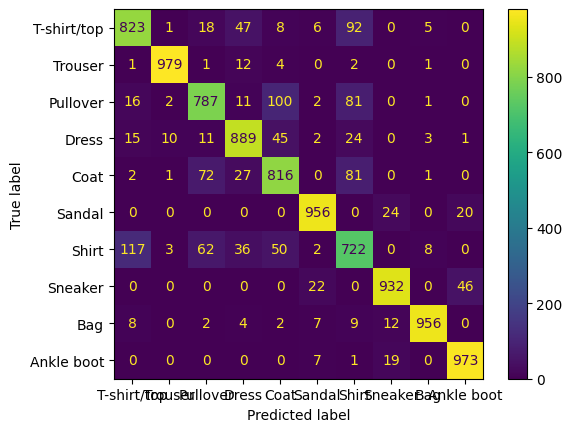

In [ ]:
import torch
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Accumuler toutes les étiquettes et les prédictions
all_labels = torch.tensor([])
all_predicted = torch.tensor([])

# Désactiver le calcul du gradient pour accélérer les calculs et réduire la mémoire
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = mlp(images)  # Utiliser le réseau MLP au lieu de CNN
        _, predicted = torch.max(outputs.data, 1)

        # Concaténer les résultats actuels avec les précédents
        all_labels = torch.cat((all_labels, labels.float()))  # Assurer le bon type de tenseur
        all_predicted = torch.cat((all_predicted, predicted.float()))

# Convertir les tenseurs en numpy arrays pour la compatibilité avec sklearn
t_test = all_labels
t_pred = all_predicted


#Classification report
print(classification_report(t_test,t_pred,target_names = classes))

#Confusion matrix
cm = confusion_matrix(t_test,t_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels = classes)
disp.plot()

### Le pLus important:
Comme vu en TP , on s'interesse plus à la ligne (accuracy) notamment avec la colonne f1-score qui represente la precision globale du modèle est de 88%, ce qui est extrêmement élevé. Cela indique que le modèle a correctement classé  88% des exemples du testset.

### Pour la matrice de confusion:
Sur la diagonale, nous avons le nombre de prédictions correctes pour chaque classe et en dehors de la diagonale le nombre de predictions incorrectes.

Les classes 8 et 9 sont prédites avec les plus fortes précisions et avec une faible confusion avec d'autres classes.

 La classe 2 Pullover a souvent été confondu avec la classe Coat (143 pullover ont été prédits comme Coat).

 La classe 6 Shirt a   souvent été confondu avec la classe T-shirt/top (171  Shirt ont été prédit comme T-shirt/top).

 Amelioration:

 En augmentant le taille du batch et le nombre de couches car avec plus de couches on peut capter des cas complexes.
La taille du batch affectera efficacité de l'apprentissage et l'utilisation de la mémoire.

On pourrait egalement modifier les paramètres comme le Taux d'apprentissage "lr" et le momentum dans le de trouver un meilleur minimum global durant l'entraînement et une stabilisation de la convergence.

Comparaison:

Les deux reseaux montrent des resultats de performance globaux simialires (89% et 88% de precision globale).

Cependant on remarque une amélioration de la classification pour certaines classes comme T-shirt/top, Coat, et Ankle boot , tandis que d'autres classes telles que Pullover, Shirt, et Sneaker ont montré une baisse de la performance.
Ceci peut etre dû au fait que le reseau mlp n'a pas de couches de convolutions et des max-poolings .





In [ ]:
import pandas as pd
from sklearn.metrics import classification_report

# Génération du rapport de classification
report = classification_report(all_labels, all_predicted, target_names=classes, output_dict=True)

# Conversion du rapport en DataFrame et exportation en CSV
report_df = pd.DataFrame(report).transpose()
report_df.to_csv('classification_reports_Mlp.csv', index=True)
print("Le rapport de classification a été exporté en classification_report.csv")

Le rapport de classification a été exporté en classification_report.csv


In [ ]:
from sklearn.metrics import confusion_matrix

# Génération de la matrice de confusion
cm = confusion_matrix(all_labels, all_predicted)

# Conversion de la matrice de confusion en DataFrame
cm_df = pd.DataFrame(cm, index=classes, columns=classes)

# Exportation en CSV
#cm_df.to_csv('confusion_matrix_Mlp.csv', index=True)
#print("La matrice de confusion a été exportée en confusion_matrix.csv")

In [ ]:
# Assuming you have the classification reports for both models as dataframes
#resnet_report = classification_report(all_labels, all_predicted, target_names=classes, output_dict=True)
#resnet_report_df = pd.DataFrame(report).transpose()

# Combine the classification reports
report_df['Model'] = 'MLP'
resnet_report_df['Model'] = 'CNNet'
combined_report_df = pd.concat([report_df, resnet_report_df])

# Export to CSV
combined_report_df.to_csv('combined_classification_report.csv', index=True)

# Similarly for confusion matrices
cm_df = pd.DataFrame(cm, index=classes, columns=classes)
cm_df['Model'] = 'MLP'
resnet_cm_df = pd.DataFrame(resnet_cm, index=classes, columns=classes)
resnet_cm_df['Model'] = 'CNNet'
combined_cm_df = pd.concat([cm_df, resnet_cm_df])

# Unpivot the combined confusion matrix for Power BI
#combined_cm_df = combined_cm_df.melt(id_vars=["Model", "True Label"], var_name="Predicted Label", value_name="Count")

# Export to CSV
combined_cm_df.to_csv('combined_confusion_matrix.csv', index=False)
print("La matrice de confusion a été exportée en confusion_matrix.csv")

La matrice de confusion a été exportée en confusion_matrix.csv


In [ ]:
mlp_cm_df = cm_df.reset_index().melt(id_vars=['index', 'Model'], var_name='Predicted Label', value_name='Count')
mlp_cm_df = cm_df.rename(columns={'index': 'True Label'})

resnet_cm_df = pd.DataFrame(resnet_cm, index=classes, columns=classes)
resnet_cm_df['Model'] = 'CNNet'
resnet_cm_df = resnet_cm_df.reset_index().melt(id_vars=['index', 'Model'], var_name='Predicted Label', value_name='Count')
resnet_cm_df = resnet_cm_df.rename(columns={'index': 'True Label'})

# Combine both DataFrames
combined_cm_df = pd.concat([mlp_cm_df, resnet_cm_df])

# Export to CSV
combined_cm_df.to_csv('combined_confusion_matrix.csv', index=False)